In [13]:
import gc
gc.collect()

302

In [14]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [2]:
import numpy as np
import skimage.measure
import pydicom
import vtk
from vtk.util import numpy_support
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
plt.gray()
os.chdir('C:/Users/span/Documents/3DSlicerTutorial/CNN.test/')
# number1 = "3dircadb"
number1 = "3dircadb/2"

<Figure size 432x288 with 0 Axes>

In [56]:
# PathDicom = "./2/PATIENT_DICOM/"
number1 = "3dircadb/2"
number2 = 14
patient1 = "p" + str(number2-1)
PathDicom = "./"+str(number1)+"/"+str(number2)
reader = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()

# Load dimensions using `GetDataExtent`
_extent = reader.GetDataExtent()
ConstPixelDims = [_extent[1]-_extent[0]+1, _extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]

# Load spacing values
ConstPixelSpacing = reader.GetPixelSpacing()

# Get the 'vtkImageData' object from the reader
imageData = reader.GetOutput()
# Get the 'vtkPointData' object from the 'vtkImageData' object
pointData = imageData.GetPointData()
# Ensure that only one array exists within the 'vtkPointData' object
assert (pointData.GetNumberOfArrays()==1)
# Get the `vtkArray` (or whatever derived type) which is needed for the `numpy_support.vtk_to_numpy` function
arrayData = pointData.GetArray(0)

# Convert the `vtkArray` to a NumPy array
ArrayDicom = numpy_support.vtk_to_numpy(arrayData)
# Reshape the NumPy array to 3D using 'ConstPixelDims' as a 'shape'
ArrayDicom = ArrayDicom.reshape(ConstPixelDims, order='F')

a_in = ArrayDicom.copy()

a_in.shape

(512, 512, 122)

In [57]:
from PIL import Image
from skimage.transform import rescale
# output  23_train_image
path0 = "./3dircadb/2p/PATIENT_DICOM/"
resize1 = 256

# output  23_train_image
# a_in.shape[2]
for i in range(a_in.shape[2]):
    image = a_in[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image)
    img0.save(path0+patient1+"_trainim_"+str("{0:03}".format(i))+".png")

In [58]:
number1 = "3dircadb/3"

PathDicom = "./"+str(number1)+"/"+str(number2)
reader = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()

# Load dimensions using `GetDataExtent`
_extent = reader.GetDataExtent()
ConstPixelDims = [_extent[1]-_extent[0]+1, _extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]

# Load spacing values
ConstPixelSpacing = reader.GetPixelSpacing()

# Get the 'vtkImageData' object from the reader
imageData = reader.GetOutput()
# Get the 'vtkPointData' object from the 'vtkImageData' object
pointData = imageData.GetPointData()
# Ensure that only one array exists within the 'vtkPointData' object
assert (pointData.GetNumberOfArrays()==1)
# Get the `vtkArray` (or whatever derived type) which is needed for the `numpy_support.vtk_to_numpy` function
arrayData = pointData.GetArray(0)

# Convert the `vtkArray` to a NumPy array
ArrayDicom = numpy_support.vtk_to_numpy(arrayData)
# Reshape the NumPy array to 3D using 'ConstPixelDims' as a 'shape'
ArrayDicom = ArrayDicom.reshape(ConstPixelDims, order='F')

a_in = ArrayDicom.copy()

a_in.shape

(512, 512, 122)

In [59]:
path0 = "./3dircadb/3p/liver/"
resize1 = 256

# output  23_train_image
# a_in.shape[2]
for i in range(a_in.shape[2]):
    image = a_in[:, :, i].astype(np.uint8).copy()
    image = rescale(image, (resize1/a_in[:, :, i].shape[1]), anti_aliasing=False)
    image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(image)
    img0.save(path0+patient1+"_trainim_"+str("{0:03}".format(i))+".png")

C:\Users\span\anaconda3\envs\tf-n-gpu\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [61]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255
#         shear_range=0.2,
#         zoom_range=0.2
#         horizontal_flip=True
)
        
val_datagen = ImageDataGenerator(rescale=1./255)

In [62]:
path1 = "3dircadb/2p"
path2 = "3dircadb/3p"
path3 = "3dircadb/4p"
path4 = "3dircadb/5p"
batch_size1 = 4

train_image_generator = train_datagen.flow_from_directory(
    path1,
    color_mode = "grayscale",
    batch_size = batch_size1 #NORMALLY 4/8/16/32
)

train_mask_generator = train_datagen.flow_from_directory(
    path2,
    color_mode = "grayscale",
    batch_size = batch_size1 #NORMALLY 4/8/16/32
)

val_image_generator = val_datagen.flow_from_directory(
    path3,
    color_mode = "grayscale",
    batch_size = batch_size1 #NORMALLY 4/8/16/32
)


val_mask_generator = val_datagen.flow_from_directory(
    path4,
    color_mode = "grayscale",
    batch_size = batch_size1 #NORMALLY 4/8/16/32
)

train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)

Found 1716 images belonging to 1 classes.
Found 1716 images belonging to 1 classes.
Found 120 images belonging to 1 classes.
Found 120 images belonging to 1 classes.


In [63]:
from keras import backend as K
import keras
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, Input
import tensorflow as tf

def get_model(optimizer, loss_metric, metrics, lr=1e-3):
    inputs = keras.Input((sample_width, sample_height, 1))
    conv1 = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='SAME')(inputs)
    conv1 = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='SAME')(conv1)
    conv1 = tf.reshape(conv1, tf.shape(conv1))
    pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    drop1 = keras.layers.Dropout(0.5)(pool1)

    conv2 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='SAME')(drop1)
    conv2 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='SAME')(conv2)
    conv2 = tf.reshape(conv2, tf.shape(conv2))
    pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    drop2 = keras.layers.Dropout(0.5)(pool2)

    conv3 = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='SAME')(drop2)
    conv3 = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='SAME')(conv3)
    conv3 = tf.reshape(conv3, tf.shape(conv3))
    pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    drop3 = keras.layers.Dropout(0.3)(pool3)

    conv4 = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='SAME')(drop3)
    conv4 = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='SAME')(conv4)
    conv4 = tf.reshape(conv4, tf.shape(conv4))
    pool4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    drop4 = keras.layers.Dropout(0.3)(pool4)

    conv5 = keras.layers.Conv2D(512, (3, 3), activation='relu', padding='SAME')(drop4)
    conv5 = keras.layers.Conv2D(512, (3, 3), activation='relu', padding='SAME')(conv5)
    conv5 = tf.reshape(conv5, tf.shape(conv5))
    
    conv5u = tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=(2, 2), strides=(2, 2), padding='SAME')(conv5)
    conv5u = tf.reshape(conv5u, tf.shape(conv5u))
    up6 = keras.layers.concatenate([conv5u, conv4], axis=3)
    conv6 = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='SAME')(up6)
    conv6 = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='SAME')(conv6)
    conv6 = tf.reshape(conv6, tf.shape(conv6))
    
    conv6u = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(2, 2), strides=(2, 2), padding='SAME')(conv6)
    conv6u = tf.reshape(conv6u, tf.shape(conv6u))
    up7 = keras.layers.concatenate([conv6u, conv3], axis=3)
    conv7 = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='SAME')(up7)
    conv7 = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='SAME')(conv7)
    conv7 = tf.reshape(conv7, tf.shape(conv7))
    
    conv7u = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(2, 2), strides=(2, 2), padding='SAME')(conv7)
    conv7u = tf.reshape(conv7u, tf.shape(conv7u))
    up8 = keras.layers.concatenate([conv7u, conv2], axis=3)
    conv8 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='SAME')(up8)
    conv8 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='SAME')(conv8)
    conv8 = tf.reshape(conv8, tf.shape(conv8))
    
    conv8u = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2, 2), strides=(2, 2), padding='SAME')(conv8)
    conv8u = tf.reshape(conv8u, tf.shape(conv8u))
    up9 = keras.layers.concatenate([conv8u, conv1], axis=3)
    conv9 = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='SAME')(up9)
    conv9 = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='SAME')(conv9)
    conv9 = tf.reshape(conv9, tf.shape(conv9))

    conv10 = keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    conv10 = tf.reshape(conv10, tf.shape(conv10))

    model = keras.Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=optimizer(lr=lr), loss=loss_metric, metrics=metrics)
    return model

In [64]:
smooth = 1.
# Dice Coefficient to work with Tensorflow
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

# Dice Coefficient to work outside Tensorflow
def dice_coef_2(y_true, y_pred):
    side = len(y_true[0])
    y_true_f = y_true.reshape(side*side)
    y_pred_f = y_pred.reshape(side*side)
    intersection = sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (sum(y_true_f) + sum(y_pred_f) + smooth)

In [85]:
sample_width = 256
sample_height = 256

model = get_model(optimizer=tf.keras.optimizers.Adam, loss_metric=dice_coef_loss, metrics=['AUC', dice_coef], lr=1e-6)

In [50]:
# model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [10]:
# historyTF = model.fit(
#     train_generator, 
#     batch_size=4, 
#     epochs=10, 
#     validation_data = 
#     (val_image_generator,
#      val_mask_generator)
# )

In [11]:
# fit the keras model on the dataset
# historyKe = model.fit(train_image_generator, train_mask_generator, epochs=150, batch_size=10)

# train_generator = zip(train_image_generator, train_mask_generator)
# val_generator = zip(val_image_generator, val_mask_generator)

# from keras import backend as K

# historyTF = model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
      2/Unknown - 0s 39ms/step - loss: -0.0399 - dice_coef: 0.0399WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0156s vs `on_train_batch_end` time: 0.0625s). Check your callbacks.
  21013/Unknown - 1681s 80ms/step - loss: -2.7743e-04 - dice_coef: 2.7743e-04

KeyboardInterrupt: 

In [86]:
NO_OF_EPOCHS = 185
NO_OF_TRAINING_IMAGES = len(os.listdir('3dircadb/2p/PATIENT_DICOM'))
NO_OF_VAL_IMAGES = len(os.listdir('3dircadb/4p/PATIENT_DICOM'))
BATCH_SIZE = 4

results = model.fit(train_generator, 
                    epochs=NO_OF_EPOCHS, 
                    steps_per_epoch = (NO_OF_TRAINING_IMAGES//BATCH_SIZE), 
                    validation_data=val_generator, 
                    validation_steps=(NO_OF_VAL_IMAGES//BATCH_SIZE)
                   )

Epoch 1/185
429/429 [==============================] - 50s 116ms/step - loss: -0.0980 - auc: 0.4399 - dice_coef: 0.0980 - val_loss: -0.1187 - val_auc: 0.5481 - val_dice_coef: 0.1187
Epoch 2/185
429/429 [==============================] - 49s 115ms/step - loss: -0.0996 - auc: 0.6530 - dice_coef: 0.0996 - val_loss: -0.1201 - val_auc: 0.6487 - val_dice_coef: 0.1201
Epoch 3/185
429/429 [==============================] - 49s 115ms/step - loss: -0.1115 - auc: 0.6383 - dice_coef: 0.1115 - val_loss: -0.1349 - val_auc: 0.7404 - val_dice_coef: 0.1349
Epoch 4/185
429/429 [==============================] - 50s 115ms/step - loss: -0.1231 - auc: 0.8053 - dice_coef: 0.1231 - val_loss: -0.1457 - val_auc: 0.8136 - val_dice_coef: 0.1457
Epoch 5/185
429/429 [==============================] - 50s 115ms/step - loss: -0.1428 - auc: 0.8642 - dice_coef: 0.1428 - val_loss: -0.1794 - val_auc: 0.8770 - val_dice_coef: 0.1794
Epoch 6/185
429/429 [==============================] - 50s 116ms/step - loss: -0.1990 - au

KeyboardInterrupt: 

In [27]:
model.save('Model_ep100.h5')

In [28]:
# !mkdir saved_model
model.save('saved_model/my_model_ep100') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model_ep50\assets


In [75]:
print(results.history.keys())

dict_keys(['loss', 'auc', 'dice_coef', 'val_loss', 'val_auc', 'val_dice_coef'])


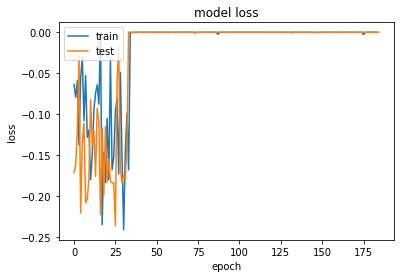

In [76]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

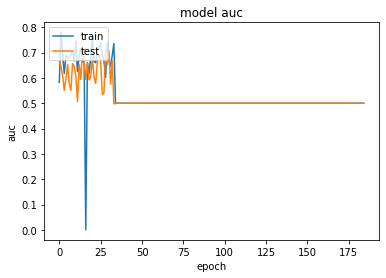

In [84]:
plt.plot(results.history['auc'])
plt.plot(results.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [57]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [81]:
from PIL import Image

# img0 = Image.fromarray(val_image_generator[3].astype(np.uint8), mode = "L")

# im = Image.new('L', (256, 256))
# im.putdata(val_image_generator[5])
dataset_as_tuple = next(val_image_generator)

image = np.array(dataset_as_tuple[0]).astype(np.uint8).copy()

image = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
img0 = Image.fromarray(image)
plt.imshow(img0)

TypeError: Cannot handle this data type: (1, 1, 256, 1), |u1

In [105]:
dataset_as_tuple = next(val_image_generator)


samples_to_predict = np.array(dataset_as_tuple[0])


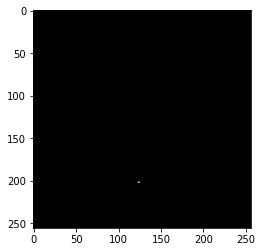

In [97]:
predictions = model.predict(dataset_as_tuple[0])
plt.imshow(np.array(dataset_as_tuple[0])[0,:,:].astype(np.uint8))

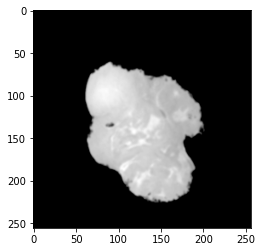

In [107]:
a1 = np.array(dataset_as_tuple[0])[0,:,:]
plt.imshow(a1)

In [108]:
print(a1.max(),a1.min())

1.0 0.0
